**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
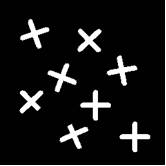
art8lab1.png: 
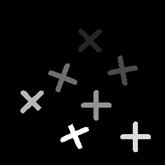
art8lab2.png: 
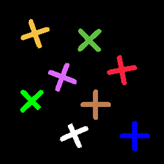
		

In [ ]:
!pip install networkx

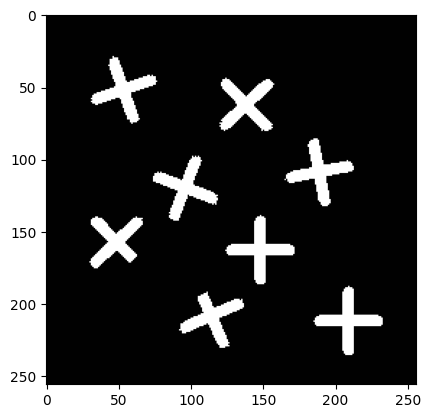

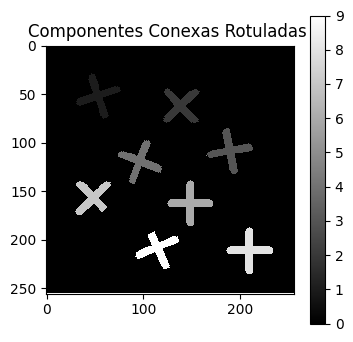

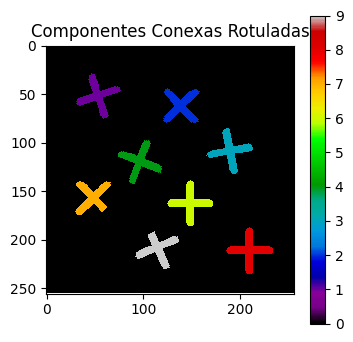

In [37]:
# code here
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

img_binaria = np.array(img) // 255  # Converte para binário (0 e 1)

colunas, linhas = img_binaria.shape

g = nx.Graph()

# percorre a matriz e add os nos dos grafos
for l in range(linhas): 
    for c in range(colunas):
        if img_binaria[l, c] == 1:
            g.add_node((l, c))

for l in range(linhas):
    for c in range(colunas):
        if img_binaria[l, c] == 1:
            # Verifica vizinhos
            if l > 0 and img_binaria[l-1, c] == 1:  # Vizinho acima
                g.add_edge((l, c), (l-1, c))
            if l < linhas - 1 and img_binaria[l+1, c] == 1:  # Vizinho abaixo
                g.add_edge((l, c), (l+1, c))
            if c > 0 and img_binaria[l, c-1] == 1:  # Vizinho à esquerda
                g.add_edge((l, c), (l, c-1))
            if c < colunas - 1 and img_binaria[l, c+1] == 1:  # Vizinho à direita
                g.add_edge((l, c), (l, c+1))

componentes =  list(nx.connected_components(g))

# Criar uma nova imagem com os rótulos
imagem_rotulada = np.zeros_like(img_binaria)
for label, componente in enumerate(componentes, 1):
    for (l, c) in componente:
        imagem_rotulada[l, c] = label

# Exibir a imagem rotulada em tons de cinza
plt.figure(figsize=(4,4))
plt.imshow(imagem_rotulada, cmap='gray', interpolation='nearest')
plt.title("Componentes Conexas Rotuladas ")
plt.colorbar()
plt.show()

# Exibir a imagem rotulada
plt.figure(figsize=(4,4))
plt.imshow(imagem_rotulada, cmap='nipy_spectral', interpolation='nearest')
plt.title("Componentes Conexas Rotuladas")
plt.colorbar()
plt.show()

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [ ]:
# code here